<a href="https://colab.research.google.com/github/kenil121200/Artificial-Intelligence/blob/master/Beer_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [48]:
dataset = pd.read_csv('/content/Consumo_cerveja.csv')

In [49]:
dataset

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [51]:
dataset.shape

(941, 7)

In [52]:
dataset.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [53]:
new_dataset=dataset.drop(range(365,941))

In [54]:
new_dataset.shape

(365, 7)

In [55]:
temperatures=new_dataset[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']]
temperatures.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm)
0,"27,3","23,9","32,5",0
1,"27,02","24,5","33,5",0
2,"24,82","22,4","29,9",0
3,"23,98","21,5","28,6","1,2"
4,"23,82",21,"28,3",0


In [56]:
import re
for index,row in temperatures.iterrows():
    for j in ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']:
        row[j]=re.sub(r',', '.', row[j])
temperatures.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm)
0,27.3,23.9,32.5,0
1,27.02,24.5,33.5,0
2,24.82,22.4,29.9,0
3,23.98,21.5,28.6,1.2
4,23.82,21,28.3,0


In [57]:
temperatures=temperatures.astype("float64")

In [58]:
final_dataset = new_dataset
for j in ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']:
    final_dataset[j]=temperatures[j]

In [68]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [59]:
final_dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [60]:
X = final_dataset[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']].values
y = final_dataset['Consumo de cerveja (litros)'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

In [63]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [64]:
print('rmse: ',rmse)
print('r2 score: ',r2)


rmse:  6.005974163948884
r2 score:  0.6615183526826032


In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
graph = df.head(20)

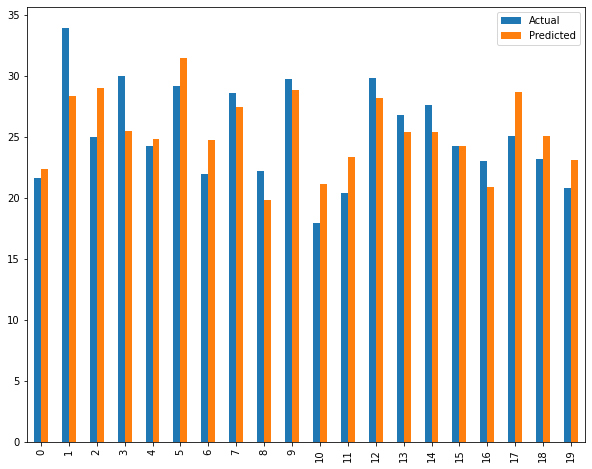

In [66]:
graph.plot(kind='bar',figsize=(10,8))
plt.show()

ValueError: ignored

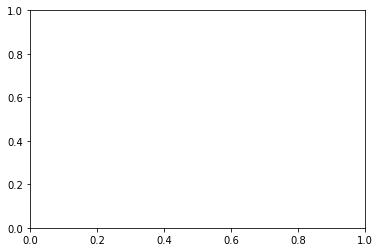

In [69]:
plt.scatter(X_train,y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Average Temperature")

plt.plot(X_test, y_pred, color='g')
plt.show()